# USA Wage Comparison for College vs. High School

Почасовая оплата для групп с разным уровнем образования.С 1973 по 2022 год. https://www.kaggle.com/datasets/asaniczka/usa-wage-comparison-for-college-vs-high-school/

## Краткое описание датасета

### (a)

Этот набор данных дает полное представление о различиях в заработной плате между выпускниками колледжей и выпускниками средних школ в США с 1973 по 2022 год.

Данные взяты из библиотеки данных о состоянии трудящихся Америки Института экономической политики и включают скорректированную заработную плату.

### (b)

### Датасет включает в себя следующие атрибуты:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_frame = pd.read_csv("../ML Labs/college_wage_premium.csv")
data_frame.dtypes

year                        int64
high_school               float64
bachelors_degree          float64
men_high_school           float64
men_bachelors_degree      float64
women_high_school         float64
women_bachelors_degree    float64
dtype: object

**year** — год данных о заработной плате,  
**high_school** — cредняя почасовая оплата выпускников средних школ скорректирована до долларов 2022 года,  
**bachelors_degree** — cредняя почасовая оплата выпускников колледжей скорректирована до долларов 2022 года,  
**men_high_school** — cредняя почасовая оплата выпускников средних школ мужского пола скорректирована до долларов 2022 года.  
**men_bachelors_degree** — cредняя почасовая оплата выпускников колледжей мужского пола скорректирована до долларов 2022 года.  
**women_high_school** — cредняя почасовая оплата выпускниц средних школ скорректирована до долларов 2022 года.  
**women_bachelors_degree** — cредняя почасовая заработная плата выпускниц колледжей женского пола скорректирована до долларов 2022 года.  

## Анализ атрибутов датасета

### (a) Cреднее значение, среднее квадратичное отклонение

In [12]:
columns = ['year', 'high_school', 'bachelors_degree', 'men_high_school','men_bachelors_degree', 'women_high_school', 
           'women_bachelors_degree']

df = data_frame[columns]
mean_values = df.drop('year', axis=1).mean()
std_values = df.drop('year', axis=1).std()
print("Средние значения:")
print(mean_values)

print("\nСтандартное отклонение (ско):")
print(std_values)


Средние значения:
high_school               20.8766
bachelors_degree          34.7686
men_high_school           23.8326
men_bachelors_degree      39.9884
women_high_school         17.5716
women_bachelors_degree    28.9264
dtype: float64

Стандартное отклонение (ско):
high_school               0.742743
bachelors_degree          3.306645
men_high_school           1.225697
men_bachelors_degree      3.734945
women_high_school         0.854342
women_bachelors_degree    3.760532
dtype: float64


### (b) Построить гистограмму распределения значений, определить есть ли выбросы

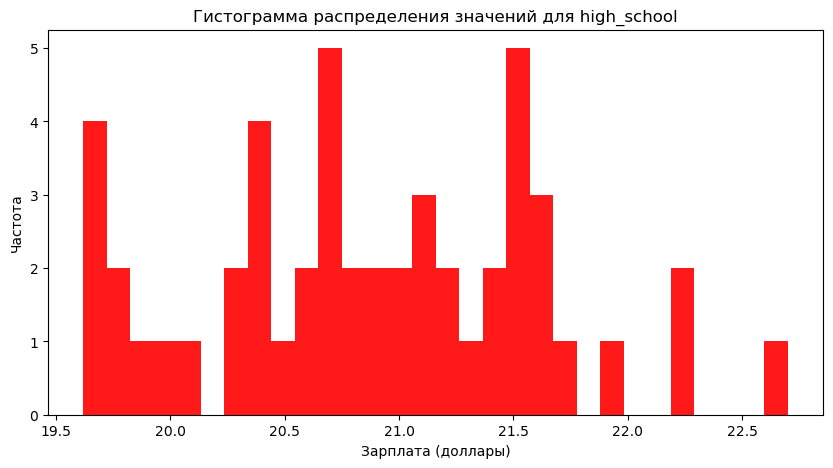

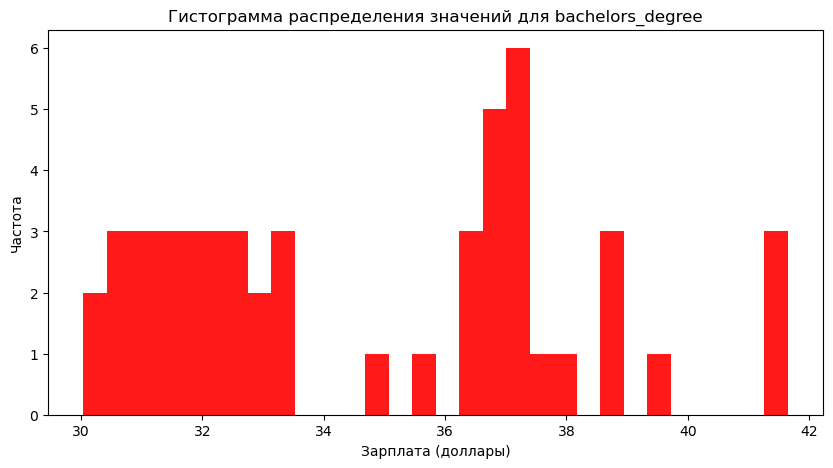

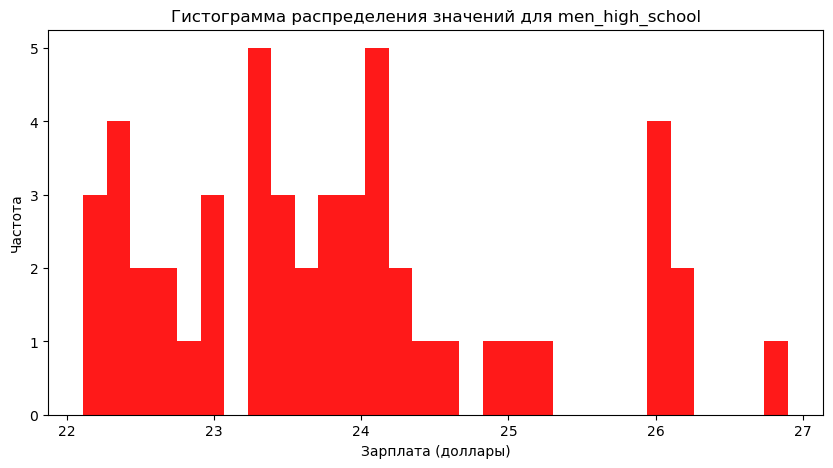

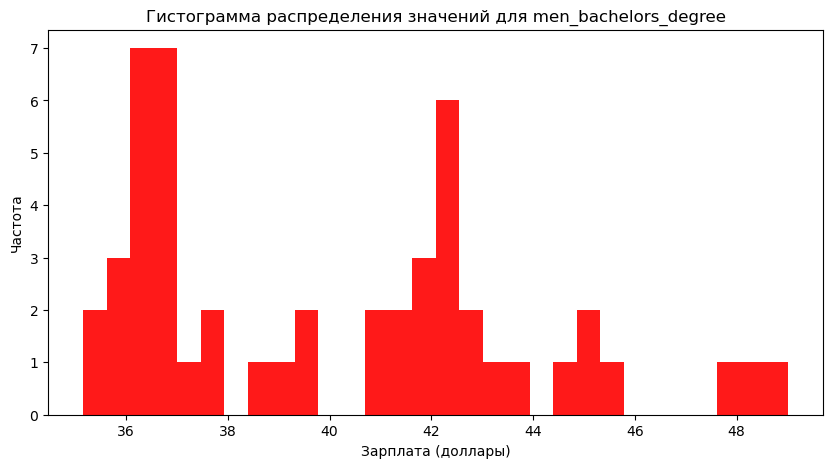

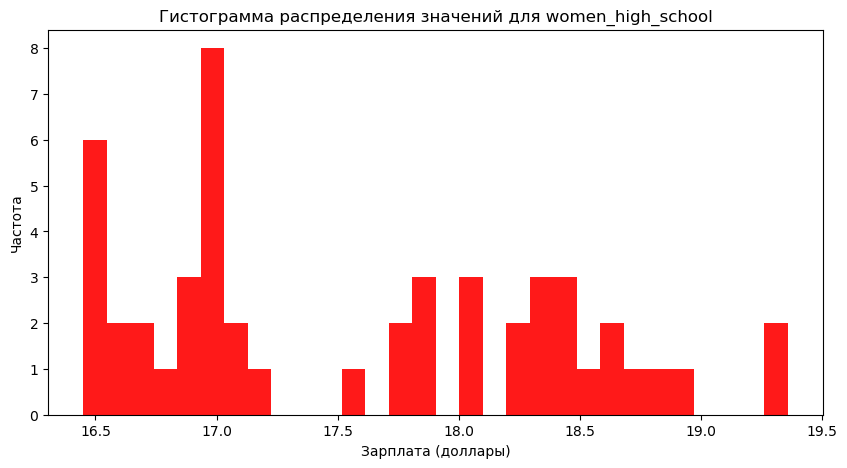

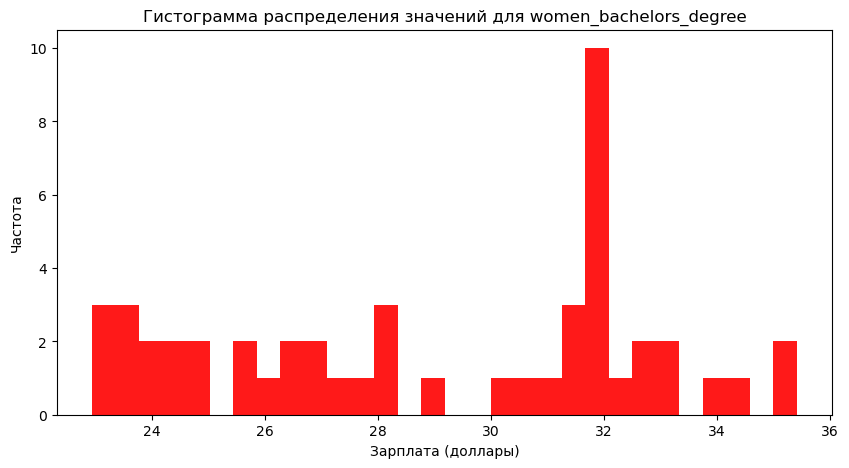

Количество выбросов в high_school : 0
Количество выбросов в bachelors_degree : 0
Количество выбросов в men_high_school : 1
Количество выбросов в men_bachelors_degree : 0
Количество выбросов в women_high_school : 0
Количество выбросов в women_bachelors_degree : 0


In [27]:
for column in df.drop('year', axis=1).columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df[column], bins=30, alpha=0.9, color = 'red')
    plt.title(f'Гистограмма распределения значений для {column}')
    plt.xlabel('Зарплата (доллары)')
    plt.ylabel('Частота')
    plt.show()

for column in df.drop('year', axis=1).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Количество выбросов в {column} : {str(len(outliers))}")

### (c) Определим наличие пропущенных значений для каждого атрибута

In [26]:
for column in df.drop('year', axis=1).columns:
    missing = df[column].isna().sum()
    print(f"Пропущенных значений в {column} : {missing}")

Пропущенных значений в high_school : 0
Пропущенных значений в bachelors_degree : 0
Пропущенных значений в men_high_school : 0
Пропущенных значений в men_bachelors_degree : 0
Пропущенных значений в women_high_school : 0
Пропущенных значений в women_bachelors_degree : 0


### (d) Варианты обработки пропущенных значений

+ **Заполнением пропущенных значений (NaN), например, средним или медианой**   
`df_normal = df.fillna(df.mean())`  
В некоторых случаях, заполнение пропущенных значений средним значением может быть разумным, особенно если пропущенные значения небольшое количество и несущественны для цели анализа. Однако важно тщательно оценить контекст и природу данных, а также рассмотреть альтернативные методы обработки пропущенных значений, такие как интерполяция.

+ **Интерполяцией пропущенных значений на основе соседних значений**  
`df_interpolated = df.interpolate()`  
Например, у нас имеется датафрейм c пропущенными значениями. Когда метод interpolate() обрабатывает этот датафрейм, он будет использовать ближайшие известные значения для интерполяции пропущенных значений. И тогда значение NaN будет интерполировано между значениями соседних строк с соответствующими индексами.


## Определение корреляции между параметрами

### (a, b) Определим какие атрибуты высококоррелированы, а также характер корреляции

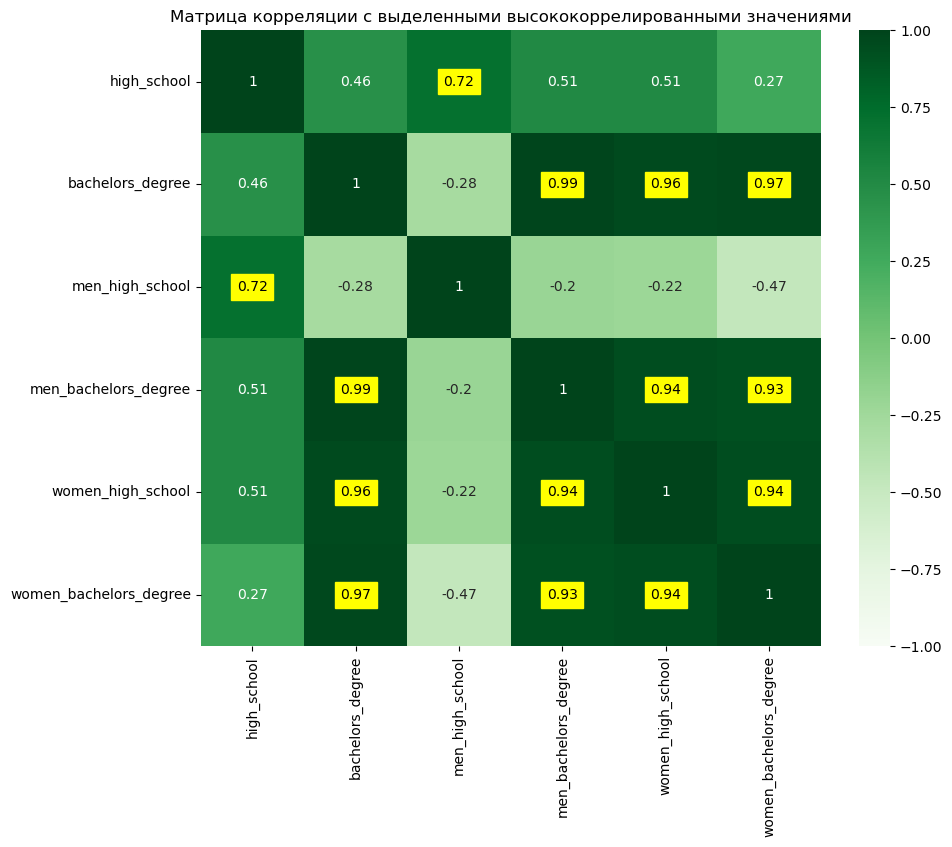

In [33]:
corr = df.drop('year', axis=1).corr()

plt.figure(figsize=(10, 8))
plt.title("Матрица корреляции с выделенными высококоррелированными значениями")
sns.heatmap(corr, annot=True, cmap="Greens", vmin=-1, vmax=1)


threshold = 0.7

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i != j and (corr.iloc[i, j] >= threshold or corr.iloc[i, j] <= -threshold):
            plt.text(i+0.5, j+0.5, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=10, color="black", backgroundcolor="yellow")


plt.show()

### (a)


В данном случае мы получаем матрицу корреляции 'corr', где каждый ее элемент представляет коэффициент корреляции Пирсона между соответствующими парами атрибутов, по умолчанию 'pearson'*). Коэффициент корреляции Пирсона может принимать значения от -1 до 1 и указывает на степень и направление линейной корреляции:

+ 1: Положительная линейная корреляция.
+ 0: Отсутствие линейной корреляции.
+ -1: Отрицательная линейная корреляция. 

Чем сильнее отклонение от 0, тем сильнее корреляция между парами. Для определения высококоррелированых атрибутов задали порог в 0,7 и -0,7 соответственно, а также добавили желтый фон таким ячейкам. Данный порог выставляется по желанию, но зачастую используют именно такой.

### Характер корреляции


**banchelors_degree** и **men_banchelors_degree** - это будет положительная корреляция, что может указывать на то, что средняя зарплата выпускников/иц колледжа больше состоит из средних зарплат выпускников, чем выпускниц. Это может значить, что процент девушек, заканчивающих колледжи меньше, чем юношей.

**Однако следует отметить, что результат корреляционного анализа может быть влиянием на различные факторы, и он не может указать на причинно-следственные связи. Это лишь показывает, какие переменные связаны между собой с точки зрения линейной корреляции.**

### (b)

В моем примере не оказалось пар с корреляцией равной 0, но можно выделить самую слабую - **men_high_school** и **men_banchelors_degree**

## (c, d) Построим матрицу графиков рассеивания и проанализируем полученные результаты

### (c) Матрица графиков рассеивания

C:\Users\alexs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


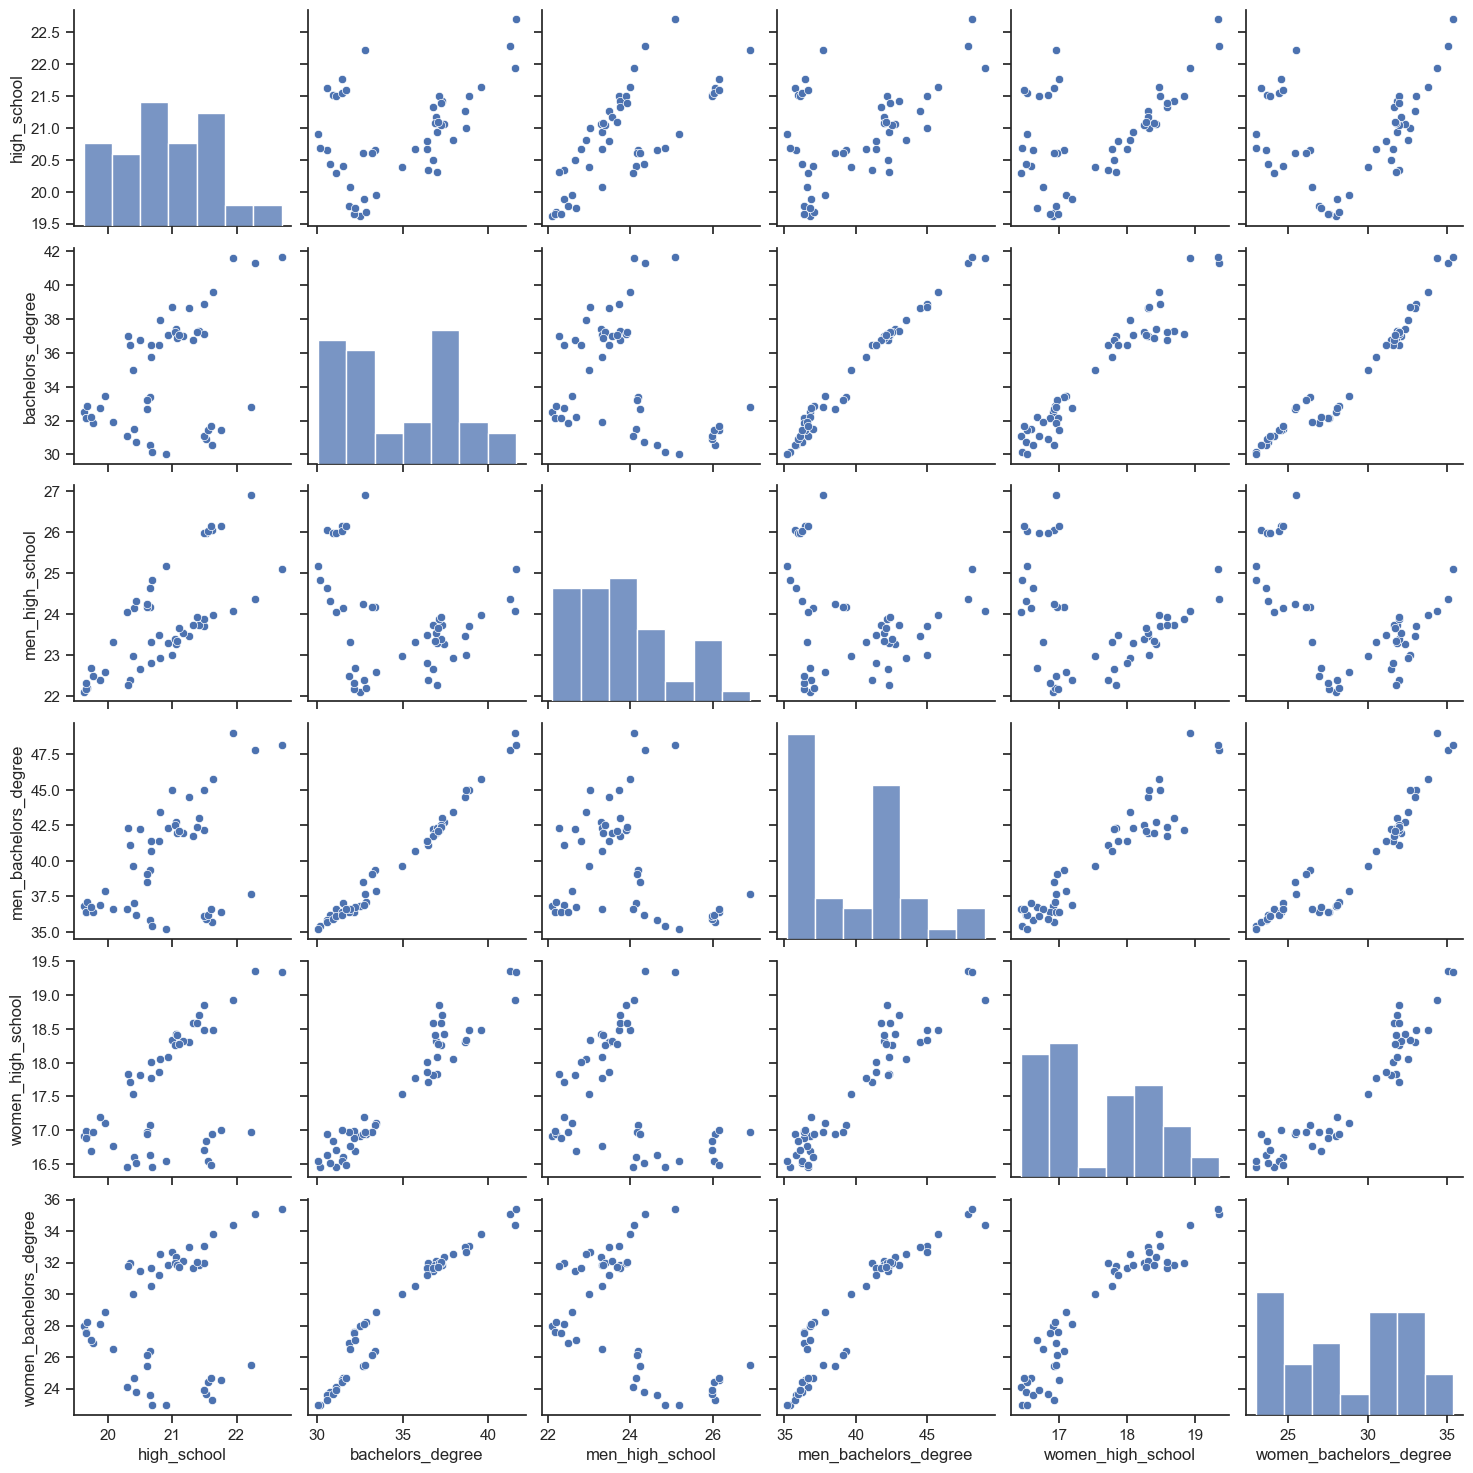

In [36]:
sns.set(style="ticks")
sns.pairplot(df.drop('year', axis=1))
plt.show()


### (d) Анализ полученных результатов

В полученной матрице графиков рассеивания мы можем оценить степень связи между параметрами. Так в нашем случае, по графикам можно увидеть следующие закономерности:  
+ Если точки на графике рассеивания формируют букву "L", или похожую на нее структуру, это может свидетельствовать о наличии двух подгрупп в данных, которые могут иметь разные характеристики.  
+ На примере графиков рассеивания **banchelors_degree** и **men_banchelors_degree**, мы можем заметить формирование точками рассеивания линейной структуры, что может нам говорить о наличии сильной положительной корреляции между уровнем дохода мужчин-выпускников колледжей и выпускников колледжей в целом. В данном контексте это означает, что большинство выпускников колледжей - мужчины.

Как и в предыдущих случаях, важно помнить, что корреляция не обязательно указывает на причинно-следственную связь. В данном случае, высшее образование и доход могут быть связаны с другими факторами, исследование которых может потребовать дополнительного анализа.